# Markov Chain E265 Coding Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import choices

weather = pd.read_csv("weather.csv")

print(weather.head())

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6 

# Exploratory Data Analysis (EDA)

In [ ]:
# Gets the percentages for the rain from the data

raindf = weather[['RainToday']]

rainCount = (raindf['RainToday'] == "Yes").sum()
noRainCount = (raindf['RainToday'] == "No").sum()

rainPercent = rainCount / raindf.shape[0]
noRainPercent = 1 - rainPercent

assert rainPercent + noRainPercent == 1

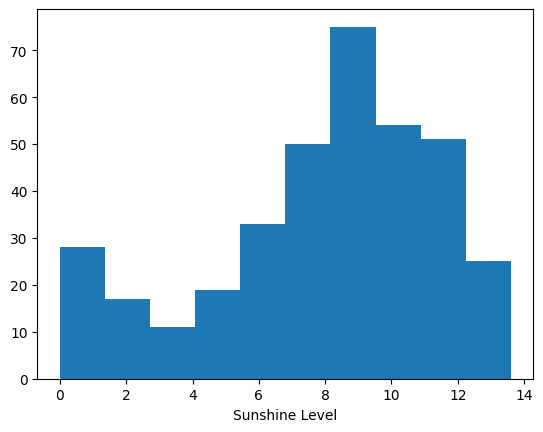

In [ ]:
# Analyzing sunshine distribution
sunshine = weather[weather['Sunshine'].notna()]

sun_hist_dat = sunshine['Sunshine'].tolist()
plt.hist(sun_hist_dat)
plt.xlabel("Sunshine Level")
plt.show()

In [ ]:
# Gets the percentages for sunshine from the data based off set sunshineCutoff variable
sunshineCutoff = 4

count_sunshine_Yes = sunshine[sunshine['Sunshine'] >= sunshineCutoff].shape[0]
count_sunshine_No = sunshine[sunshine['Sunshine'] <= sunshineCutoff].shape[0]

sunshinePercent = count_sunshine_Yes / sunshine.shape[0]
noSunshinePercent = count_sunshine_No / sunshine.shape[0]

assert sunshinePercent + noSunshinePercent == 1

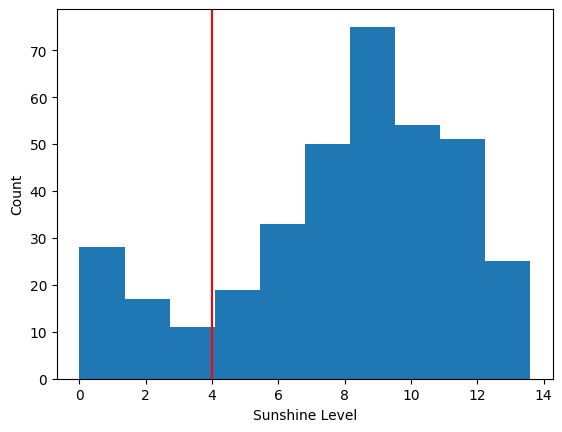

In [ ]:
# Visualizing sunshine cutoff
sun_hist_dat = sunshine['Sunshine'].tolist()
plt.hist(sun_hist_dat)
plt.axvline(x=sunshineCutoff, color='red')
plt.xlabel("Sunshine Level")
plt.ylabel("Count")
plt.show()

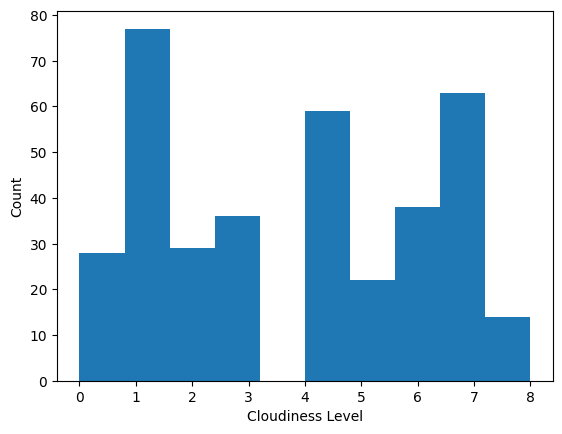

In [ ]:
# Analyzing cloudiness
cloudydf = weather[['Cloud9am', 'Cloud3pm']].copy()

# New cloudy column that averages the two time values
cloudydf['CloudDay'] = ((cloudydf['Cloud9am'] + cloudydf['Cloud3pm']) / 2).astype(int)

cloud_hist_dat = cloudydf['CloudDay'].tolist()
plt.hist(cloud_hist_dat)
plt.xlabel("Cloudiness Level")
plt.ylabel("Count")
plt.show()

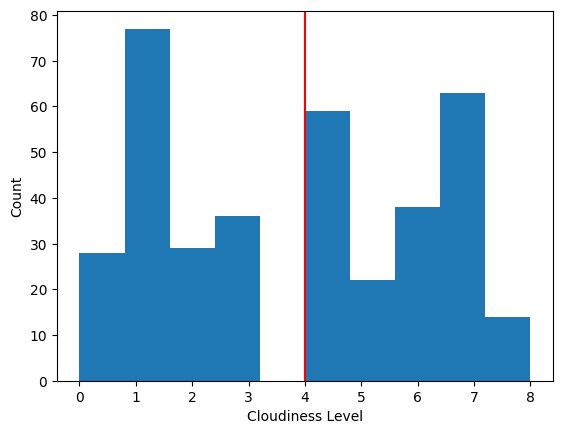

   Cloud9am  Cloud3pm  CloudDay  isCloudy
0         7         7         7         1
1         5         3         4         1
2         8         7         7         1
3         2         7         4         1
4         7         7         7         1


In [ ]:
# Plotting a histogram of Cloudiness to see distribution and find CloudCutoff
cloudCutoff = 4

cloudydf['isCloudy'] = (cloudydf['CloudDay'] >= cloudCutoff).astype(int)

cloud_hist_dat = cloudydf['CloudDay'].tolist()
plt.hist(cloud_hist_dat)
plt.axvline(x=cloudCutoff, color='red')
plt.xlabel("Cloudiness Level")
plt.ylabel("Count")
plt.show()

print(cloudydf.head())

In [ ]:
# Final cloud percents
cloudyPercent = (cloudydf['isCloudy'] == 1).sum() / cloudydf.shape[0]
noCloudyPercent = 1 - cloudyPercent

assert cloudyPercent + noCloudyPercent == 1

In [ ]:
# Weather Findings

# Sunny
print(f'Sunny Percent (SC = 4): {int(round(sunshinePercent,2)*100)}%')
print(f'Not Sunny / Clear Percent (SC = 4): {int(round(noSunshinePercent,2)*100)}%\n')

# Cloudy
print(f'Cloudy Percent (CC = 4): {int(round(cloudyPercent,2)*100)}%')
print(f'Not Cloudy Percent (CC = 4): {int(round(noCloudyPercent,2)*100)}%\n')

# Rain
print(f'Rain Percent: {int(round(rainPercent,2)*100)}%')
print(f'No Rain / Clear Percent: {int(round(noRainPercent,2)*100)}%')

Sunny Percent (SC = 4): 85%
Not Sunny / Clear Percent (SC = 4): 15%

Cloudy Percent (CC = 4): 54%
Not Cloudy Percent (CC = 4): 46%

Rain Percent: 18%
No Rain / Clear Percent: 82%


In [ ]:
# Sunny -> Sunny Weight
sunnyToSunnydf = sunshine[['Sunshine']].copy()
sunnyToSunnydf['isSunny'] = (sunnyToSunnydf['Sunshine'] >= sunshineCutoff).astype(int)
sunnyToSunnydf['isPrevSunny'] = (sunnyToSunnydf['isSunny'] == sunnyToSunnydf['isSunny'].shift(1)).astype(int)

sunToSunRatio = (sunnyToSunnydf['isPrevSunny'] == 1).sum() / sunnyToSunnydf.shape[0]

In [ ]:
# Cloudy -> Cloudy Weight
cloudyToCloudydf = cloudydf[['isCloudy']].copy()
cloudyToCloudydf['isPrevCloudy'] = (cloudyToCloudydf['isCloudy'] == cloudyToCloudydf['isCloudy'].shift(1)).astype(int)

cloudToCloudRatio = (cloudyToCloudydf['isPrevCloudy'] == 1).sum() / cloudyToCloudydf.shape[0]

In [ ]:
# Rain -> Rain Weight
rainToRaindf = pd.DataFrame()
rainToRaindf['RainToday'] = raindf['RainToday'].map({'Yes': 1, 'No': 0})
rainToRaindf['isPrevRain'] = (rainToRaindf['RainToday'] == rainToRaindf['RainToday'].shift(1)).astype(int)

rainToRainRatio = (rainToRaindf['isPrevRain'] == 1).sum() / rainToRaindf.shape[0]

In [ ]:
# Chain Weights

# Sunny -> Sunny
print(f'Sunny -> Sunny Weight: {int(round(sunToSunRatio,2)*100)}%')
print(f'{sunToSunRatio}\n')

# Cloudy -> Cloudy
print(f'Cloudy -> Cloudy Weight: {int(round(cloudToCloudRatio,2)*100)}%')
print(f'{cloudToCloudRatio}\n')

# Rain -> Rain
print(f'Rain -> Rain Weight: {int(round(rainToRainRatio,2)*100)}%')
print(f'{rainToRainRatio}')

Sunny -> Sunny Weight: 79%
0.7933884297520661

Cloudy -> Cloudy Weight: 63%
0.6284153005464481

Rain -> Rain Weight: 75%
0.7513661202185792


# Markov Chain Implementation

In [ ]:
# Weights calculated from weather data
p = np.array([
#   Sun  Cloud Rain
   [0.79, 0.13, 0.08],  # Sun
   [0.16, 0.63, 0.21],  # Cloud
   [0.08, 0.17, 0.75]   # Rain
])

# All possible states
states = ["Sunny", "Cloudy", "Rain"]

# Simulates weather predictions with Markov Chains
def weather_chain(start, days):
  jumps = [start]
  prev = start
  for _ in range(days):
    weight = p[states.index(prev)].astype(float).tolist()
    next = choices(states, weights = weight, k = 1)[0]
    jumps.append(next)
    prev = next
  return jumps

#User Input Variable Test (under existing Markov Chain)

In [ ]:
# Get user input for starting weather
def get_start_input():
    while True:
        user_input = input("Enter starting weather ")
        if user_input in states:
            return user_input
        else:
            print("Invalid input. Please enter Sunny, Cloudy, Rain")

# Get the starting state from user
start = get_start_input()

# Simulates a 10 day forecast
print(f"\nStarting weather: {start}")
print(f"10-day forecast: {weather_chain(start, 10)}")

Enter starting weather Rain

Starting weather: Rain
10-day forecast: ['Rain', 'Rain', 'Rain', 'Rain', 'Rain', 'Cloudy', 'Cloudy', 'Cloudy', 'Cloudy', 'Cloudy', 'Cloudy']


How can we make this relate to real world possibilities/forecasts?

#Calculating Steady State

In [ ]:
import numpy as np
from random import choices

p = np.array([
#   Sun  Cloud Rain
   [0.79, 0.13, 0.08],  # Sun
   [0.16, 0.63, 0.21],  # Cloud
   [0.08, 0.17, 0.75]   # Rain
])

states = ["Sunny", "Cloudy", "Rain"]

def weather_chain(start, days):
  jumps = [start]
  prev = start
  for _ in range(days):
    weight = p[states.index(prev)].astype(float).tolist()
    next = choices(states, weights = weight, k = 1)[0]
    jumps.append(next)
    prev = next
  return jumps

def steady_state_prediction(start_state, trials, days):
    state_counts = {state: 0 for state in states}
    total_observations = 0

    print(f"\nRunning {trials:,} trials of {days:,} days each...")
    print(f"Starting from: {start_state}")

    for trial in range(trials):
        chain = weather_chain(start_state, days)
        for state in chain[1:]:  # Skip the initial state
            state_counts[state] += 1
            total_observations += 1

    print(f"Steady state prediction after {trials} trials of {days} days: ")

    for state in states:
        probability = (state_counts[state] / total_observations) * 100
        print(f"{state}: {probability:.2f}%") #this numb wont add to 100% because we have to round, but it will be close.

    return state_counts

# Provide a default value for 'start' to resolve the NameError if not set by previous cells.
start = "Sunny"

# Run steady-state prediction
state_counts = steady_state_prediction(start, trials=10000, days=1000)


Running 10,000 trials of 1,000 days each...
Starting from: Sunny
Steady state prediction after 10000 trials of 1000 days: 
Sunny: 35.74%
Cloudy: 28.79%
Rain: 35.46%


#Visualization of all three possibilities of starting state

How many trials would you like? 10000

Starting from: Cloudy
  Cloudy: 29.57%
  Sunny: 34.97%
  Rain: 35.46%

Starting from: Sunny
  Cloudy: 28.56%
  Sunny: 36.82%
  Rain: 34.63%

Starting from: Rain
  Cloudy: 28.74%
  Sunny: 34.59%
  Rain: 36.67%


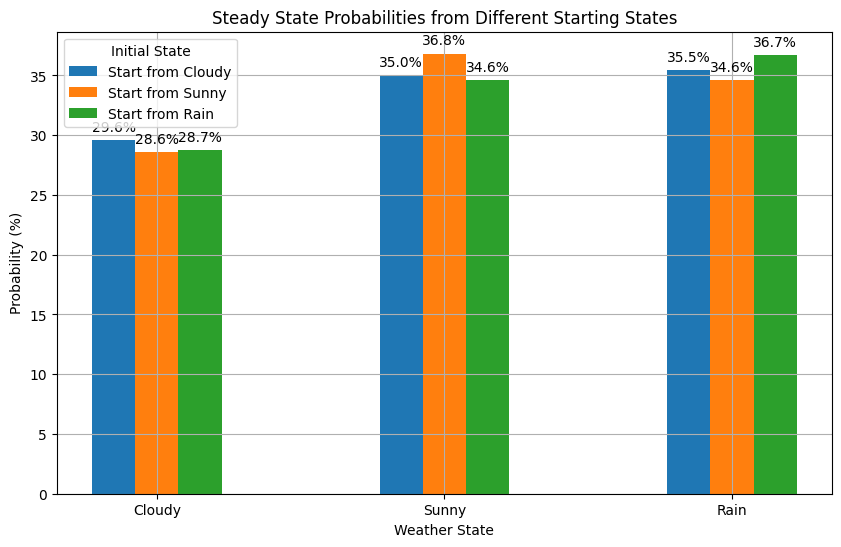

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def run_steady_state_for_all_starts():
    states = ['Cloudy', 'Sunny', 'Rain']
    trials = int(input("How many trials would you like? "))
    days = 100

    results = {}

    for start_state in states:
        print(f"\nStarting from: {start_state}")
        state_counts = {state: 0 for state in states}
        total_observations = 0

        for trial in range(trials):
            chain = weather_chain(start_state, days)
            for state in chain[1:]:  # Skip the initial state
                state_counts[state] += 1
                total_observations += 1

        # Calculate probabilities for this starting state
        probabilities = {}
        for state in states:
            probabilities[state] = (state_counts[state] / total_observations) * 100

        results[start_state] = probabilities

        # Print results for this starting state
        for state in states:
            print(f"  {state}: {probabilities[state]:.2f}%")

    return results, states

def plot_steady_state_results(results, states):

    x = np.arange(len(states))
    width = 0.15

    fig, ax = plt.subplots(figsize=(10, 6))

    # bars for each state
    for i, start_state in enumerate(['Cloudy', 'Sunny', 'Rain']):
        probabilities = [results[start_state][state] for state in states]
        offset = (i - 1) * width
        bars = ax.bar(x + offset, probabilities, width, label=f'Start from {start_state}')

        # values on top of bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{height:.1f}%', ha='center', va='bottom')

    ax.set_xlabel('Weather State')
    ax.set_ylabel('Probability (%)')
    ax.set_title('Steady State Probabilities from Different Starting States')
    ax.set_xticks(x)
    ax.set_xticklabels(states)
    ax.legend(title='Initial State')
    ax.grid(True)

if __name__ == "__main__":
    # Run simulations
    results, states = run_steady_state_for_all_starts()

    # visualization (grouped by starting state)
    plot_steady_state_results(results, states)

Front end application?
Drop down
Wordpress- front end
Maybe attatch video explaining- 1 min script